<!--
SPDX-FileCopyrightText: 2024 The eminus developers
SPDX-License-Identifier: Apache-2.0
-->
# Band structures

In [1]:
from eminus import Cell, SCF
from eminus.extras import plot_bandstructure

In [2]:
# Create a cell for a silicon crystal
# It only contains one k-point, but this is enough to create a nice band structure
# Specify the number of bands we want to calculate (here we have 4 occupied bands and 4 unoccupied bands)
cell = Cell("Si", "diamond", ecut=10, a=10.2631, bands=8)

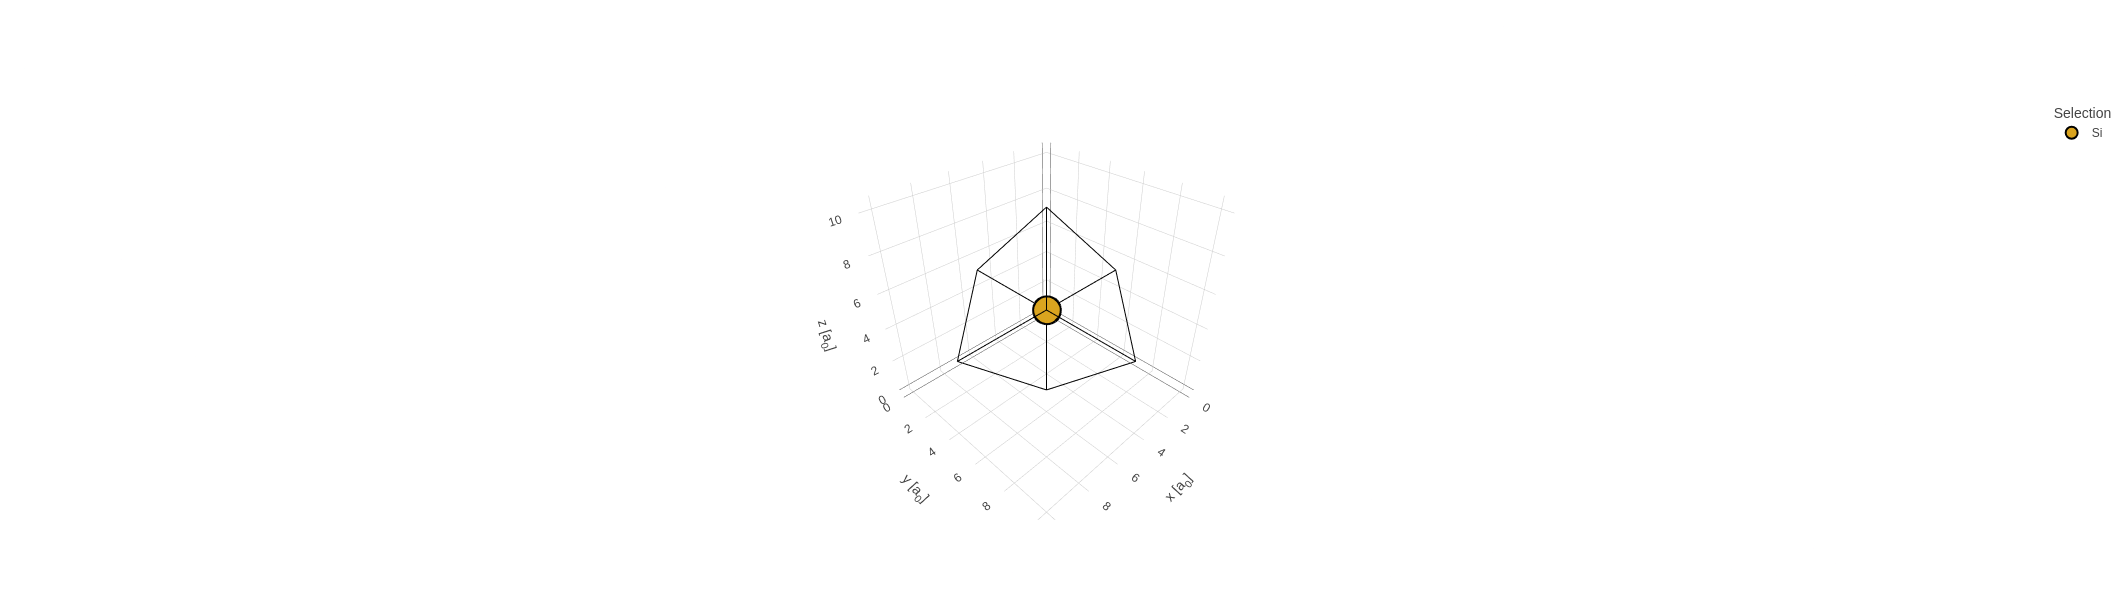

In [3]:
# Let's take a look at the cell first
cell.view()

In [4]:
# Do the DFT calculation
scf = SCF(cell, etol=1e-5)
scf.run();

Start auto minimization...
Method  Iteration  Etot [Eh]    dEtot [Eh]   |Gradient|   
pccg           1   +13.495751   
pccg           2   +1.610131    -1.1886e+01  [+2.30e+03]  
pccg           3   -2.929543    -4.5397e+00  [+3.16e+02]  
pccg           4   -5.273781    -2.3442e+00  [+6.06e+01]  
pccg           5   -6.371354    -1.0976e+00  [+1.19e+01]  
pccg           6   -6.819118    -4.4776e-01  [+2.54e+00]  
pccg           7   -6.986510    -1.6739e-01  [+6.62e-01]  
pccg           8   -7.067039    -8.0529e-02  [+2.32e-01]  
pccg           9   -7.116239    -4.9200e-02  [+1.05e-01]  
pccg          10   -7.166926    -5.0686e-02  [+7.17e-02]  
pccg          11   -7.215263    -4.8338e-02  [+7.13e-02]  
pccg          12   -7.249710    -3.4446e-02  [+4.34e-02]  
pccg          13   -7.270572    -2.0862e-02  [+1.94e-02]  
pccg          14   -7.283618    -1.3046e-02  [+1.09e-02]  
pccg          15   -7.289574    -5.9559e-03  [+5.78e-03]  
pccg          16   -7.291941    -2.3671e-03  [+2.52e-03

In [5]:
# To create a band structure we have to generate a k-path
scf.kpts.path = "LGXU,KG"
# Specify the number of k-points the sampled path should contain
scf.kpts.Nk = 25

In [6]:
# We can display our Brillouin zone with all special points and the sampled band path
scf.kpts.build().view()

In [7]:
# Run the calculation for the new sampled k-points
# This will do a minimization for a fixed Hamiltonian (the one we have found in the previous calculation, saved in the SCF object)
# The calculation will perform two steps:
# 1. Find a set of occupied orbitals that minimize the band energies
# 2. Find a set of unoccupied orbitals that are orthogonal to the occupied ones that also minimize their band energies
scf.converge_bands();

Minimize occupied band energies...
Start auto minimization...
Method  Iteration  Etot [Eh]    dEtot [Eh]   |Gradient|   
pccg           1   +13.528242   
pccg           2   +3.816956    -9.7113e+00  [+7.18e+01]  
pccg           3   +2.018460    -1.7985e+00  [+1.15e+01]  
pccg           4   +1.154521    -8.6394e-01  [+3.91e+00]  
pccg           5   +0.764094    -3.9043e-01  [+1.32e+00]  
pccg           6   +0.579888    -1.8421e-01  [+5.05e-01]  
pccg           7   +0.487176    -9.2712e-02  [+2.47e-01]  
pccg           8   +0.437014    -5.0162e-02  [+1.28e-01]  
pccg           9   +0.405138    -3.1876e-02  [+7.07e-02]  
pccg          10   +0.382471    -2.2667e-02  [+4.57e-02]  
pccg          11   +0.367114    -1.5357e-02  [+3.19e-02]  
pccg          12   +0.358589    -8.5251e-03  [+1.90e-02]  
pccg          13   +0.354492    -4.0969e-03  [+9.13e-03]  
pccg          14   +0.352233    -2.2597e-03  [+4.83e-03]  
pccg          15   +0.350965    -1.2680e-03  [+3.06e-03]  
pccg          16   +

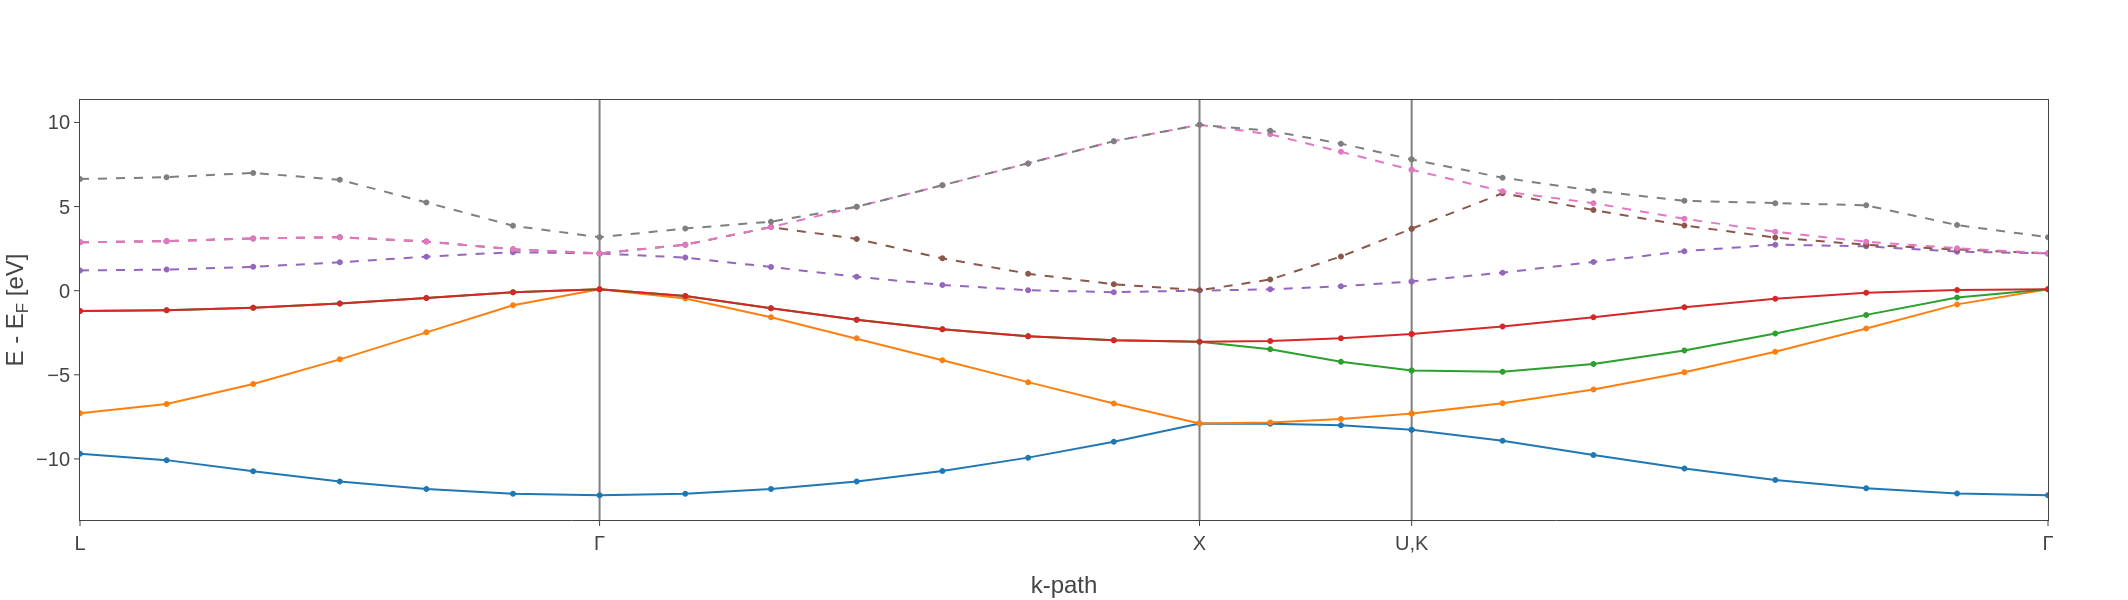

In [8]:
# At last, plot the resulting band structure
plot_bandstructure(scf)